# Nobel Prize Winners Data Analysis

## Project Overview and Learning Objectives

This notebook demonstrates advanced data analysis techniques using the Nobel Prize winners dataset (1901-2023).


### **What Will be Covered:**
- **Data Import & Exploration**: Using pandas to load and explore large datasets
- **Data Aggregation**: Mastering `groupby()`, `value_counts()`, and custom aggregation functions
- **Data Visualization**: Creating publication-ready plots with matplotlib and seaborn
- **Data Transformation**: Efficient reshaping and filtering techniques
- **Performance Optimization**: Vectorized operations vs. loops


## Creative Country Visualization Strategy

### The Challenge: 129 Countries in the Dataset

With 129 different countries represented, a single bar chart would be completely unreadable. This is a common real-world data visualization challenge that requires strategic thinking.

### **Approach:**

1. **Top N Analysis**: Focus on countries with the most winners (Pareto Principle)
2. **Grouped Categories**: "Top 10 + Others" technique for pie charts
3. **Dual Visualization**: Horizontal bars for precision, pie charts for proportions
4. **Hierarchical Grouping**: Could extend to continents/regions



In [127]:
import numpy as np          
import matplotlib.pyplot as plt  
import pandas as pd         
import seaborn as sns

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

<img src="data/Nobel_Prize.png" alt="Gold Nobel Prize medal featuring a left-facing profile of Alfred Nobel. Inscriptions include ALFR NOBEL and his birth and death years, NAT MDCCCXXXIII OB MDCCCXCVI." width="400">

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the nobel.csv file in the data folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [128]:
# Data Import
nobel = pd.read_csv("data/nobel.csv")

nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


## Part 1: Gender Analysis - Understanding Representation Patterns

### **Analytical Question**: What is the gender distribution of Nobel Prize winners?

### **Learning Objectives:**
1. **`value_counts()`**: The go-to method for categorical data frequency analysis
2. **Dual Visualization Strategy**: Bar charts for exact values, pie charts for proportions
3. **Annotation Techniques**: Adding data labels for clarity
4. **Color Psychology**: Using meaningful colors (pink/blue) vs. neutral palettes

### **Key Pandas Concept**: 
`value_counts()` returns a Series with counts as values and categories as index - perfect for immediate plotting with seaborn!

---

Analyze Nobel Prize winner data and identify patterns by answering the following questions:

- What is the most commonly awarded gender and birth country?

Store your answers as string variables `top_gender` and `top_country`.

In [129]:
# value_counts() automatically sorts in descending order - most frequent first
gender_counts = nobel['sex'].value_counts()
country_counts = nobel["birth_country"].value_counts()

# - Index: the unique values (categories)
# - Values: the frequency counts

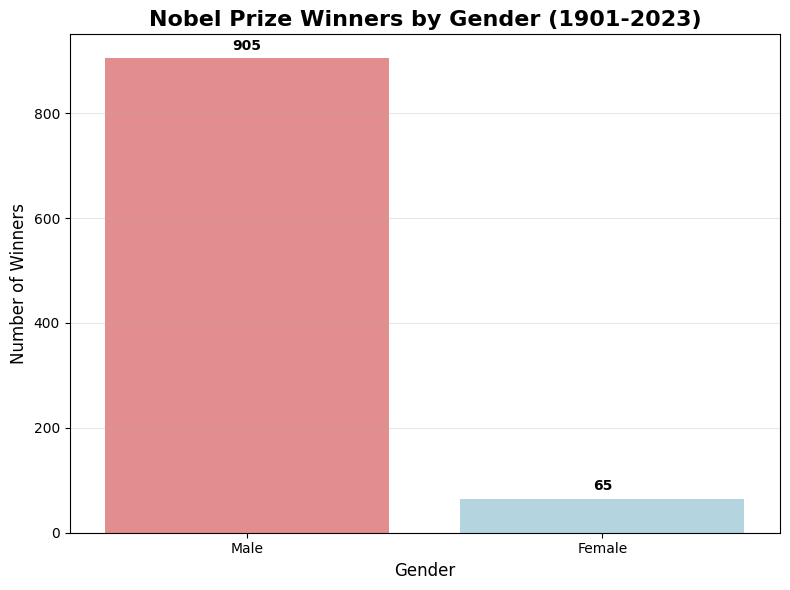

In [130]:
# Single Visualization: Simple Bar Chart
plt.figure(figsize=(8, 6))

sns.barplot(x=gender_counts.index, y=gender_counts.values, 
           hue=gender_counts.index, palette=['lightcoral', 'lightblue'], legend=False)

plt.title('Nobel Prize Winners by Gender (1901-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Winners', fontsize=12)
plt.grid(axis='y', alpha=0.3)  # Horizontal grid lines for easier reading

# Data annotation loop: Add exact values on top of bars
# enumerate() gives us both index (i) and value (v) for positioning
for i, v in enumerate(gender_counts.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()  # Automatically adjusts spacing to prevent label cutoff
plt.show()

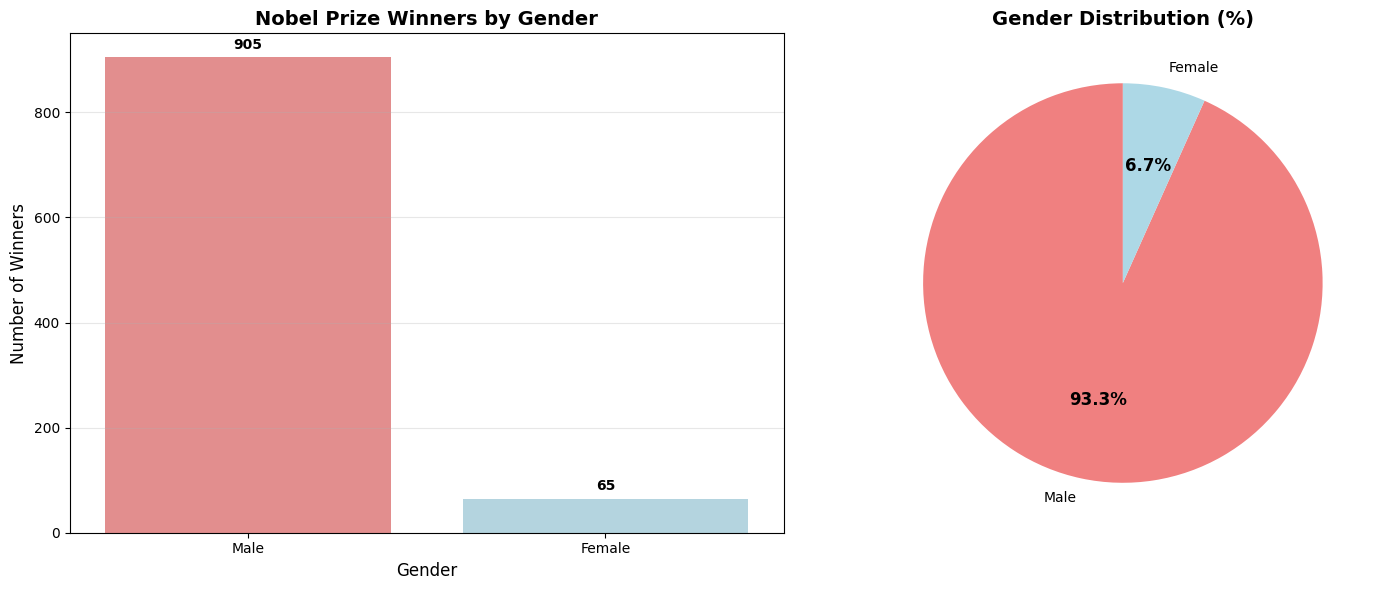

In [131]:
# Dual Visualization: Combining bar and pie charts 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Left subplot: Bar chart for precise value comparison
sns.barplot(x=gender_counts.index, y=gender_counts.values, 
           hue=gender_counts.index, palette=['lightcoral', 'lightblue'], ax=ax1, legend=False)
ax1.set_title('Nobel Prize Winners by Gender', fontsize=14, fontweight='bold')
ax1.set_xlabel('Gender', fontsize=12)
ax1.set_ylabel('Number of Winners', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Value annotation: Critical for exact comparisons
for i, v in enumerate(gender_counts.values):
    ax1.text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

# Right subplot: Pie chart for proportional understanding
colors = ['lightcoral', 'lightblue']
wedges, texts, autotexts = ax2.pie(gender_counts.values, labels=gender_counts.index, 
                                  autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Gender Distribution (%)', fontsize=14, fontweight='bold')

# Typography enhancement: Make percentage labels more visible
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.tight_layout()
plt.show()

### **Dual Visualization Strategy: Complementary Chart Types**

**Subplot Strategy**: `plt.subplots(1, 2)` creates a 1×2 grid for side-by-side comparison.

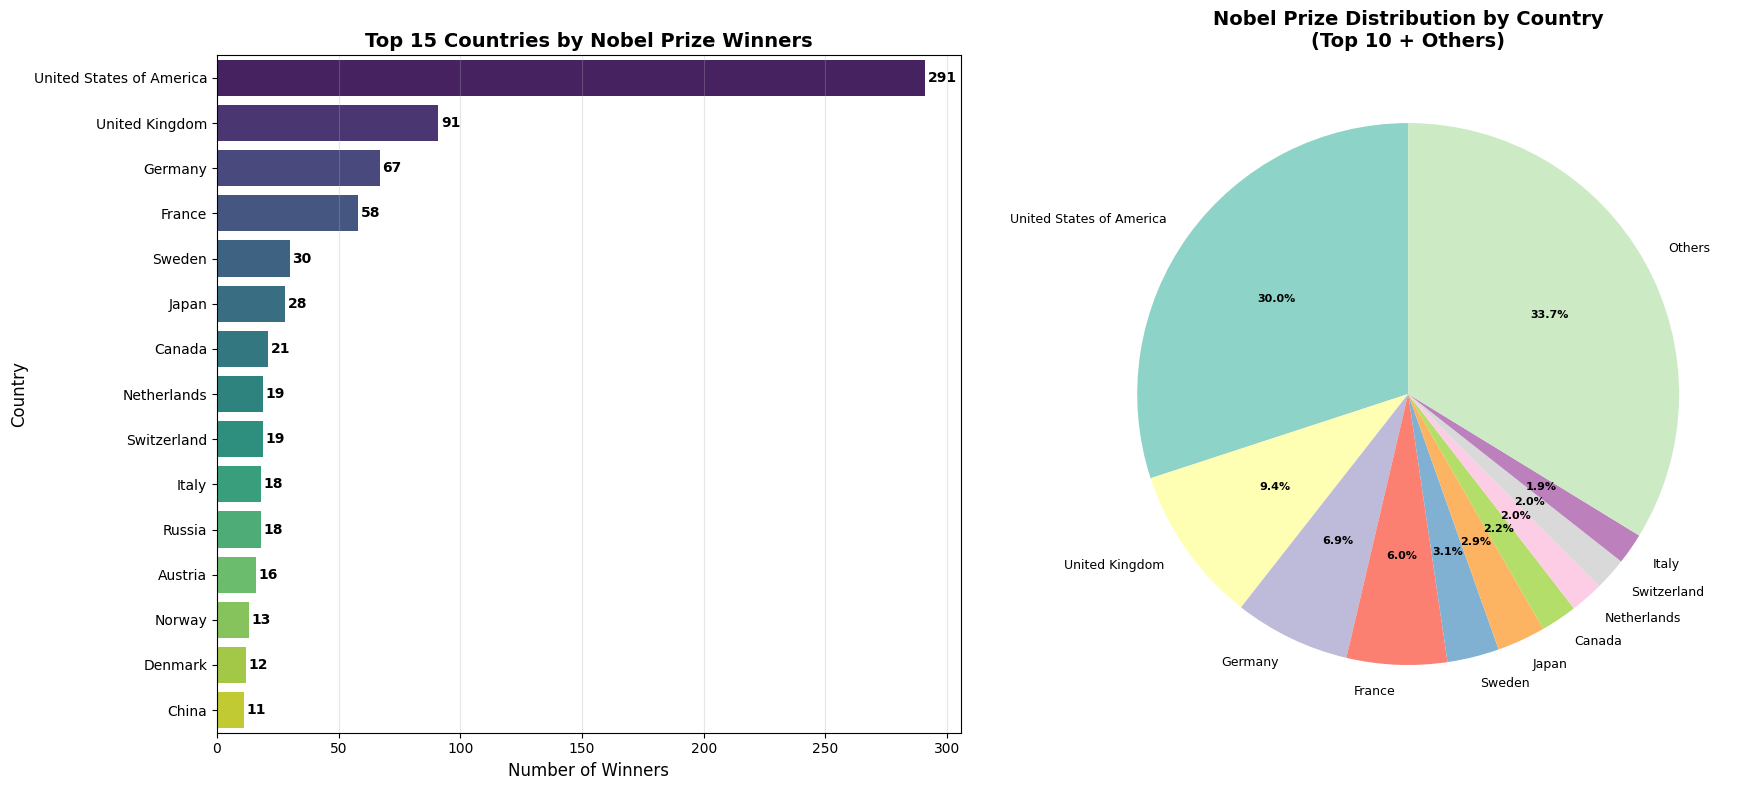

In [132]:
# Strategic Approach: Top-N + Hierarchical Grouping for 129 countries
top_countries = country_counts.head(15)  # Focus on most significant contributors

# Wide subplot layout for complex dual visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# LEFT PANEL: Horizontal bar chart for top 15 countries
# hue=top_countries.index gives each country a unique color
sns.barplot(y=top_countries.index, x=top_countries.values, 
           hue=top_countries.index, ax=ax1, palette='viridis', legend=False)
ax1.set_title('Top 15 Countries by Nobel Prize Winners', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Winners', fontsize=12)
ax1.set_ylabel('Country', fontsize=12)
ax1.grid(axis='x', alpha=0.3)  # Vertical grid for horizontal bars

# Value annotation: Essential for precise comparisons
for i, v in enumerate(top_countries.values):
    ax1.text(v + 1, i, str(v), va='center', fontweight='bold')

# RIGHT PANEL: Pie chart with "Others" aggregation technique
top_10 = country_counts.head(10)
others_count = country_counts[10:].sum()  # Aggregate remaining 119 countries

# Combine top 10 + "Others" for digestible pie chart
pie_data = list(top_10.values) + [others_count]
pie_labels = list(top_10.index) + ['Others']

# plt.cm.Set3() provides 12 distinct colors - perfect for our 11 segments
colors = plt.cm.Set3(range(len(pie_data)))
wedges, texts, autotexts = ax2.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', 
                                  colors=colors, startangle=90)
ax2.set_title('Nobel Prize Distribution by Country\n(Top 10 + Others)', fontsize=14, fontweight='bold')

# Typography optimization for readability
for text in texts:
    text.set_fontsize(9)  # Country labels
for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_fontweight('bold')  # Percentage labels

plt.tight_layout()
plt.show()

Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

- Store this as an integer called `max_decade_usa`.

In [133]:
# Integer division trick: (year // 10) * 10 converts any year to its decade start
# Example: 1987 → 1980, 1993 → 1990, 2001 → 2000
nobel["decade"] = (nobel["year"] // 10) * 10

nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1900
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1900
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1900
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1900
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1900


In [134]:
# Efficient Data Subsetting Strategy
# .copy() prevents SettingWithCopyWarning and creates independent DataFrame
country_decade_subset = nobel[["birth_country", "decade"]].copy()

country_decade_subset.head()

,birth_country,decade
0,Netherlands,1900
1,France,1900
2,Prussia (Poland),1900
3,Switzerland,1900
4,France,1900


In [135]:
# Chained Operations: Filter → Group → Aggregate
# Boolean filtering: Creates mask for USA-born winners only
# .groupby('decade').size(): Counts occurrences per decade
# .size() vs .count(): size() includes NaN values, count() excludes them
usa_by_decade = (country_decade_subset[country_decade_subset["birth_country"] == "United States of America"]
                 .groupby("decade")
                 .size())

# Result is a Series with decade as index, counts as values
usa_by_decade

decade
1900     1
1910     3
1920     4
1930    14
1940    13
1950    21
1960    21
1970    33
1980    31
1990    42
2000    52
2010    38
2020    18
dtype: int64

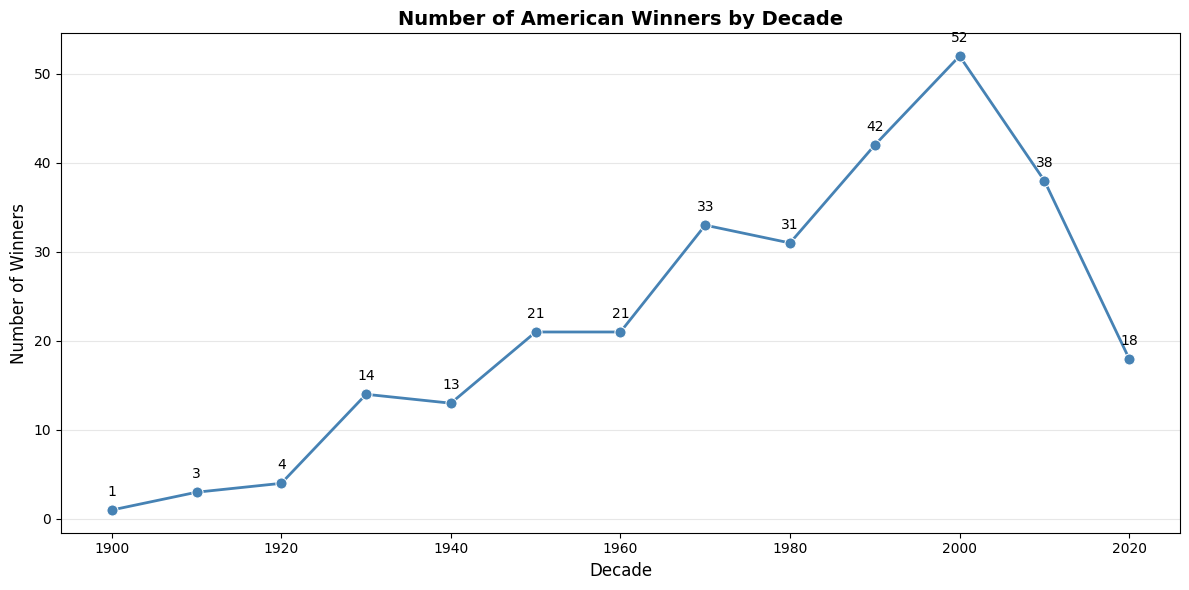

In [136]:
# Create subplot with line plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create the line plot
sns.lineplot(x=usa_by_decade.index, y=usa_by_decade.values, ax=ax, marker='o', linewidth=2, markersize=8, color='steelblue')
ax.set_title("Number of American Winners by Decade", fontsize=14, fontweight="bold")
ax.set_xlabel("Decade", fontsize=12)
ax.set_ylabel("Number of Winners", fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Add value labels on points
for decade, count in usa_by_decade.items():
    ax.annotate(str(count), (decade, count), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

In [137]:
# Store the answer variables as requested
max_decade_usa = str(usa_by_decade.idxmax())
max_decade_usa

'2000'

## Part 4: Advanced Female Winner Analysis - Mastering GroupBy Operations

### **Analytical Question**: Which decade and Nobel Prize category combination had the highest proportion of female laureates?

### **The Data Challenge**: Multi-Dimensional Analysis
This question requires analyzing data across **two dimensions simultaneously**:
1. **Temporal Dimension**: Decades (1900s, 1910s, ..., 2020s)
2. **Categorical Dimension**: Prize categories (Peace, Literature, Medicine, etc.)

### **Topics:**
1. **Complex GroupBy Operations**: Multi-column grouping with custom aggregation
2. **Lambda Functions in Pandas**: Creating custom aggregation logic
3. **Method Chaining**: Fluent data transformation pipelines
4. **Pivot Tables**: Reshaping data for matrix-style analysis
5. **Query Method**: SQL-like filtering for cleaner code

### **The Aggregation Strategy:**
```python
# Multi-level groupby: Group by BOTH category AND decade
.groupby(['category', 'decade'])
# Custom aggregation: Different functions for different insights
.agg(
    total_count=('sex', 'size'),                    # Total winners per group
    female_count=('sex', lambda x: (x == 'Female').sum())  # Female winners per group
)
# Feature engineering: Calculate percentage
.assign(female_percentage=lambda df: df.female_count / df.total_count * 100)
```

- **Vectorized Operations**: Much faster than loops
- **Readable Code**: Method chaining tells a story
- **Flexible Analysis**: Easy to modify aggregation logic
- **Scalable**: Works efficiently with large datasets


In [138]:
# Initial Data Exploration: Female Winners Subset
# Always start with .copy() to prevent SettingWithCopyWarning
female_only = nobel[nobel["sex"] == "Female"].copy()

# Display the subset for visual inspection
female_only

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria,1900
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Female,NaN,NaN,NaN,1940-03-16,Mårbacka,Sweden,1900
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,1910
128,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,597,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",Italy,Female,NaN,NaN,NaN,1936-08-15,Rome,Italy,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,2022,Literature,The Nobel Prize in Literature 2022,"""for the courage and clinical acuity with whic...",1/1,1017,Individual,Annie Ernaux,1940-09-01,Lillebonne,France,Female,NaN,NaN,NaN,NaN,NaN,NaN,2020
989,2023,Medicine,The Nobel Prize in Physiology or Medicine 2023,"""for their discoveries concerning nucleoside b...",1/2,1024,Individual,Katalin Karikó,1955-01-17,Szolnok,Hungary,Female,Szeged University,Szeged,Hungary,NaN,NaN,NaN,2020
993,2023,Physics,The Nobel Prize in Physics 2023,"""for experimental methods that generate attose...",1/3,1028,Individual,Anne L’Huillier,1958-08-16,Paris,France,Female,Lund University,Lund,Sweden,NaN,NaN,NaN,2020
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN,2020


In [139]:
# Multi-dimensional aggregation with method chaining

stats_df = (nobel.groupby(['category', 'decade'])  # Group by TWO dimensions simultaneously
            .agg(                                   # Custom aggregation functions
                total_count=('sex', 'size'),       # size() counts all rows (including NaN)
                female_count=('sex', lambda x: (x == 'Female').sum())  # Custom lambda for conditional counting
            )
            .assign(female_percentage=lambda df: df.female_count / df.total_count * 100)  # Feature engineering
            .reset_index()                          # Convert grouped data back to DataFrame
            .query('female_count > 0')              # SQL-style filtering: only groups with female winners
            .sort_values('female_percentage', ascending=False))  # Sort by our calculated metric


# Vectorized operations are 10-100x faster than loops
# Method chaining tells a clear data story
# Easy to modify any step in the pipeline
# Works efficiently with millions of rows

# Create visualization-ready data structures
female_proportions = stats_df.pivot(index='category', columns='decade', values='female_percentage').fillna(0)
top_combinations_df = stats_df.head(10)

stats_df.head()

,category,decade,total_count,female_count,female_percentage
32,Literature,2020,4,2,50.000000
57,Peace,2010,14,5,35.714286
31,Literature,2010,10,3,30.000000
29,Literature,1990,10,3,30.000000
12,Chemistry,2020,10,3,30.000000


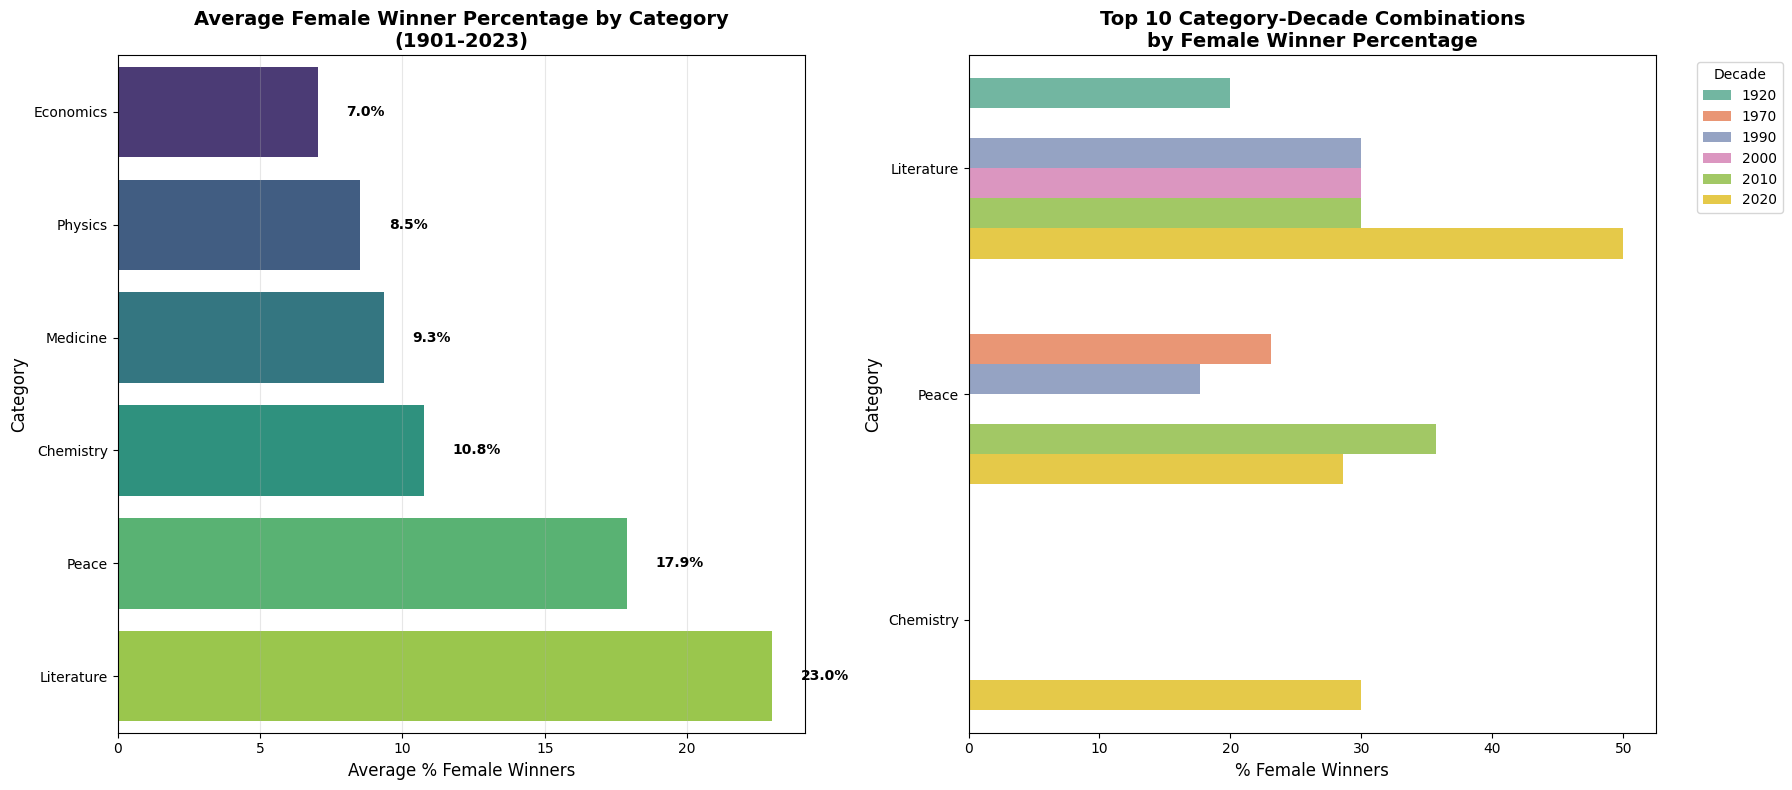

In [140]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# LEFT PANEL: Category-level insights (aggregated view)
category_avg = stats_df.groupby('category')['female_percentage'].mean().sort_values()

sns.barplot(y=category_avg.index, x=category_avg.values, 
           ax=ax1, palette="viridis", hue=category_avg.index, legend=False)

ax1.set_title("Average Female Winner Percentage by Category\n(1901-2023)", 
             fontsize=14, fontweight="bold")

ax1.set_xlabel("Average % Female Winners", fontsize=12)

ax1.set_ylabel("Category", fontsize=12)

ax1.grid(axis="x", alpha=0.3)  # Horizontal grid for horizontal bars

# Precision annotation: Essential for exact comparisons
for i, v in enumerate(category_avg.values):
    ax1.text(v + 1, i, f'{v:.1f}%', va="center", fontweight="bold")

# RIGHT PANEL: Granular insights (category-decade combinations)
# Shows temporal patterns within categories - reveals progress over time
sns.barplot(data=top_combinations_df, y="category", x="female_percentage", 
           hue="decade", ax=ax2, palette="Set2")
ax2.set_title("Top 10 Category-Decade Combinations\nby Female Winner Percentage", 
             fontsize=14, fontweight="bold")
ax2.set_xlabel("% Female Winners", fontsize=12)
ax2.set_ylabel("Category", fontsize=12)
ax2.legend(title="Decade", bbox_to_anchor=(1.05, 1), loc="upper left")  # Legend outside plot area

plt.tight_layout()
plt.show()



In [141]:

# Find the overall maximum percentage across all combinations
max_female_percentage = female_proportions.max().max()  # .max().max() flattens 2D to single value

# Find which decade contains the maximum
max_decade = female_proportions.max().idxmax()  # Which decade has the highest max value

# Find which category within that decade has the maximum
max_category = female_proportions.idxmax()[max_decade]  # Which category has max in that decade

# Store the answer in the required format
max_female_dict = {int(max_decade): max_category}
